In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [36]:
alpha = 1
x0 = 0 # Left hand x limit
xL = 2 # Right hand x limit

In [37]:
N = 21  # 10
x = np.linspace(x0, xL, N+1)
h = (xL - x0) / N

In [38]:
k = 0.01
steps = 100
t = np.array([i*k for i in range(steps+1)])

In [39]:
r = alpha*k / h**2
r

1.1025000000000003

In [40]:
# assert r < 0.5, f"Must have r < 0.5, currently r={r}"

In [41]:
from scipy import sparse
diag = [1, *(1-2*r for _ in range(N-1)), 1]
abv_diag = [0, *(r for _ in range(N-1))]
blw_diag = [*(r for _ in range(N-1)), 0]

In [42]:
A = sparse.diags([blw_diag, diag, abv_diag], (-1, 0, 1), shape=(N+1, N+1), dtype=np.float64, format="csr")

In [43]:
u = np.zeros((steps+1, N+1), dtype=np.float64)

In [44]:
def initial_profile(x):
    return 3*np.sin(np.pi*x/2)

In [45]:
u[0, :] = initial_profile(x)

In [46]:
for i in range(steps):
    u[i+1, :] = A @ u[i, :]

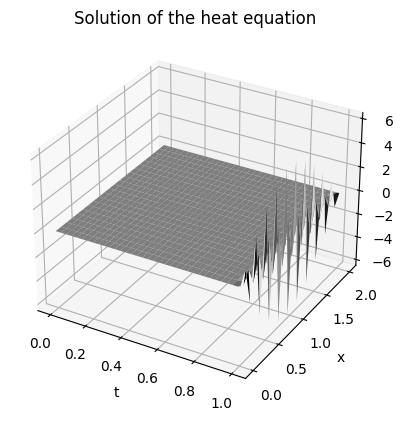

In [47]:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(T, X, u, cmap="gray")
ax.set_title("Solution of the heat equation")
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("u")
plt.show()
